In [4]:
# Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

                          name  iterations    real_time     cpu_time  \
0   Build: FLAT/L2/VectorFloat           3  204864000.0  204863000.0   
1  Search: FLAT/L2/VectorFloat           3  284172000.0  283670000.0   

  time_unit  bytes_per_second  items_per_second  label  error_occurred  \
0        ns               NaN               NaN    NaN             NaN   
1        ns               NaN               NaN    NaN             NaN   

   error_message   Index Size  
0            NaN  512000000.0  
1            NaN  512000000.0  
[0.204864, 0.28417200000000004]


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (98,)  and requested shape (2,)

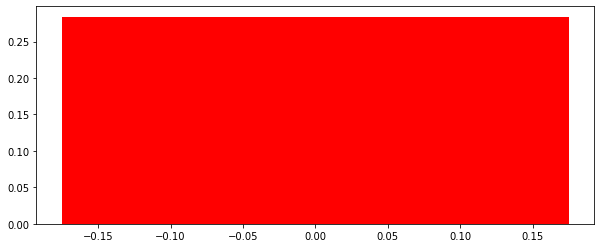

In [22]:
data = pd.read_csv('~/ssh_mount/bench_parameter_tuning_flat.csv', skiprows=9)
df = pd.DataFrame(data)
df.filter(like='Search', axis=0)
print(df)

time = list(df["real_time"]) # Y0
time[:] = [x /1000.0/1000.0/1000.0 for x in time] # unit: second
print(time)
f = plt.figure()
f.set_figwidth(10)


# # Plot the data using bar() method
x = np.arange(len([1]))
plt.bar(x, time, width=0.35, label='time (s)', color='r', tick_label=nlist_nprobe)
# plt.bar(x + 0.35, recall, width=0.35, label='Recall (%)', color='g')

plt.title("FLAT Search")
# plt.xlabel("nlist, nprobe")
# plt.ylabel("Y NAME")
  
# Show the plot
plt.legend()
plt.show()

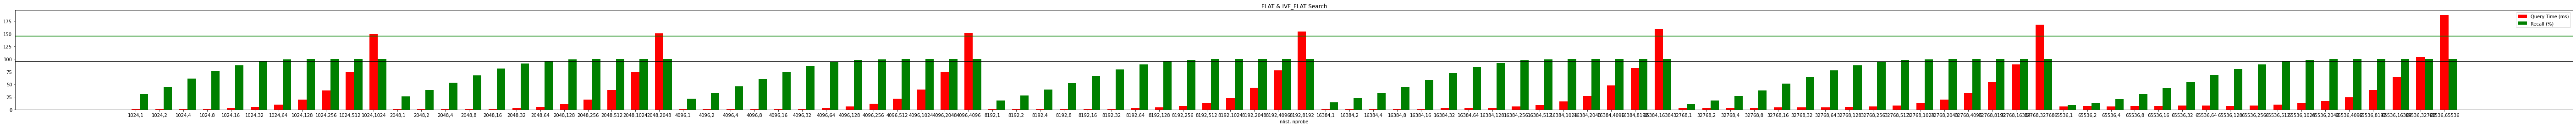

<Figure size 432x288 with 0 Axes>

In [37]:
# data = pd.read_csv('~/ssh_mount/bench_parameter_tuning_ivfflat_v2.csv', skiprows=10)
data = pd.read_csv('~/ssh_mount/bench_parameter_tuning_ivfflat_0511.csv', skiprows=9)
# data = pd.read_csv('~/Desktop/bench_parameter_tuning_ivfflat_v2.csv', skiprows=10)
df = pd.DataFrame(data)
df.filter(like='Search', axis=0)

nlist = list(df["nlist"]) # X0
nprobe = list(df["nprobe"]) # X1
nlist_nprobe = nlist
nlist_nprobe[:] = [str(x) + "," + str(nprobe[index]) for index,x in enumerate(nlist_nprobe)]

time = list(df["real_time"]) # Y0
time[:] = [x /1000.0 for x in time] # unit: second
recall = list(df["Recall"]) # Y1
recall[:] = [x * 100 for x in recall] # unit: MiB
  
      
f = plt.figure()
f.set_figwidth(100)
# plt.axhline(y = 100, color = 'blue', linestyle = '-')
plt.axhline(y = 95, color = 'black', linestyle = '-')
plt.axhline(y = 145, color = 'green', linestyle = '-')

# Plot the data using bar() method
x = np.arange(len(nlist))
plt.bar(x, time, width=0.35, label='Query Time (ms)', color='r', tick_label=nlist_nprobe)
plt.bar(x + 0.35, recall, width=0.35, label='Recall (%)', color='g')

plt.title("FLAT & IVF_FLAT Search")
plt.xlabel("nlist, nprobe")
# plt.ylabel("Y NAME")
  
# Show the plot
plt.legend()
plt.show()
plt.savefig("0728_ti_gexi.jpg")

